In [1]:
#import the libraries for analysis,visualisation and modelling
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual

# PROBLEM STATEMENT

 ACME Insurance Inc. offers affordable health insurance to thousands of customer all over
the United States. As the lead data scientist at ACME, you're tasked with creating an automated system
to estimate the annual medical expenditure for new customers, using information such as their age,
sex, BMI, children, smoking habits and region of residence.
Estimates from your system will be used to determine the annual insurance premium (amount paid every
month) offered to the customer. Due to regulatory requirements, you must be able to explain why your
system outputs a certain prediction.
You're given a CSV File containing historical data, consisting of the aforementioned information and the actual medical charges incured by over 1300 customers.

<h2 id="understanding_data">Understanding the Data</h2>

### `insurance.csv`:

We have downloaded a fuel consumption dataset, **`insurance.csv`**, which contains demographic data of cutomers 

*   **AGE** e.g. 18,19
*   **SEX** e.g. male, female
*   **BMI** e.g. 27,34.5
*   **SMOKER** e.g. yes,no
*   **REGION** e.g. northwest, southwest
*   **CHARGES** e.g 4445


In [3]:
#load and preview first 5 row of the data
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#check the shape
df.shape

(1338, 7)

<p>The dataset contains 1338 and 7 columns.Each row of the dataset contains information about a customer</p>

<p>Our objectives is to find a way to estimate the value in the charges column using the values in the other columns. If we can do so for the hitsorical data,then we should be able to estimate charges for new customers too, simply by asking for information like their age,sex,BMI, no. of children, smoking habit and so on. </p>

In [5]:
#check for missing data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#check the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>

<p> The age ,BMI, charges and children are continuos variables(integers and floats) whereas sex,smoker and region are categorical variables respectively </p>

In [7]:
#show statistical analysis of the data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<p>From the data gotten the minimum age recorded is 18years and maximum recorded is 64yrs
We may not have to do much data cleaning as there is no sign of missing data or negative data
some of the clients had no child before they sign up for the insurance premium
The minimum charge paid by a customer is 1121.87 and maximum  63770 dollars</p>

In [8]:
#statiscal analysis of categorical data
df.describe(include=object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


*  We have two unique values for the gender column(male and female) with malSe being the highest occuring most
* Most of the clients are non smokers
* Most clients come from the southeast region


The following settings will improve the default style and font sizes for our charts.


In [9]:
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (13,7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


# EXPLORATORY DATA ANALYSIS AND VISUALISATION

### AGE

In [10]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

* Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins


<AxesSubplot:>

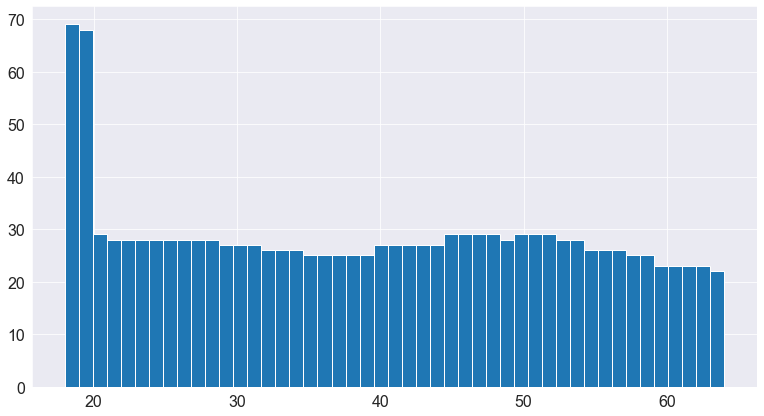

In [11]:
df['age'].hist(bins=47)

* The distribution of ages in the dataset is unimodal and skewed to the right(mean greater than the median signifies that).The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages
18 and 19, which seem to have over twice as many customers as other ages which might be as a result of free incentive if they signed up early and 18 years being the legal adult age in the U.S.A


<AxesSubplot:>

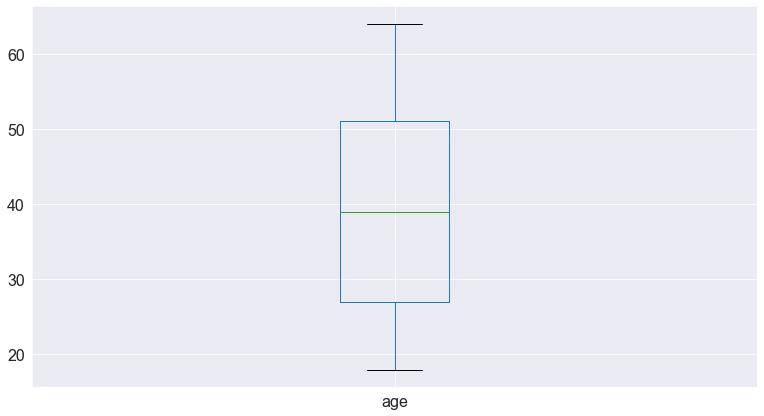

In [12]:
df['age'].plot(kind='box')

* it seems to be no apparent outliers in the age column

### BODY MASS INDEX(BMI)

<p>Body Mass Index is a person weight in kilograms divided by the square of height in meters. BMI is an inexpensive and easy screening method for weight category- underweight,healthyweight,overweight,obesity. It's a measure of body fat based on height and weightand applies to both men and women</p>


<b>BMI Weight Status</b>
<ul>
    <li>"Below 18.5": Underweight</li>
    <li>"18.5-24.9":  Healthy Weight</li>
    <li>"25.0-29.9 ": Overweight</li>
    <li>"30.0-39.9":   Obesity</li>
    <li>"Greater than 40": "morbid Obesity</li>
</ul>












In [13]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

Text(0.5, 1.0, 'Frequency Distribution of BMI among the clients')

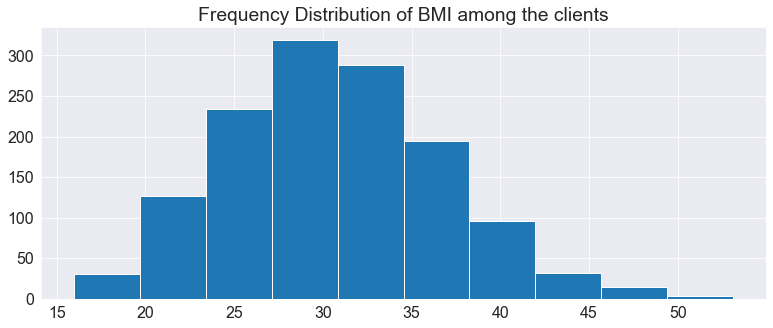

In [14]:
df['bmi'].hist(figsize=(13,5))
plt.title("Frequency Distribution of BMI among the clients")

<p>The distribution of BMI is symmetric, roughly bell shaped(mean and median are almost the same) with center at 30, range of 45(between 15 to 53.13 )</p>

In [15]:
status = []
for i in df['bmi']:
    if i < 18.5:
        status.append('Underweight')
    elif i>=18.5 and i<25:
        status.append('HealthyWeight')
    elif i>=25 and i<=30:
        status.append('overweight')
    elif i>=30 and i<=40:
        status.append('obesity')
    else:
        status.append('morbid_obesity')
df['status']  = status
    

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges,status
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obesity
2,28,male,33.000,3,no,southeast,4449.46200,obesity
3,33,male,22.705,0,no,northwest,21984.47061,HealthyWeight
4,32,male,28.880,0,no,northwest,3866.85520,overweight


In [17]:
df['status'].value_counts()

obesity           614
overweight        388
HealthyWeight     225
morbid_obesity     91
Underweight        20
Name: status, dtype: int64

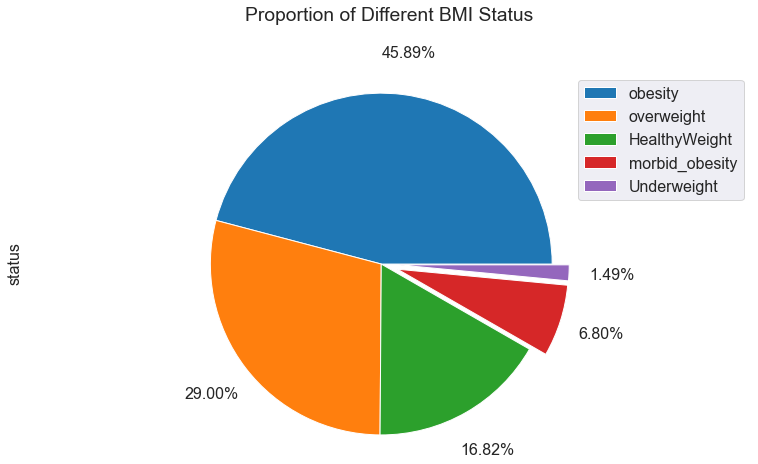

In [18]:
df['status'].value_counts().plot(kind='pie',
                                autopct='%1.2f%%',
                                labels=None,
                                pctdistance=1.25,
                                explode=[0,0,0,0.1,0.1]
                                )
# scale the title up by 12% to match pctdistance
plt.title('Proportion of Different BMI Status', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df['status'].value_counts().index,loc='best') 

plt.show()

* 45% of the customers BMI status is obesity

<AxesSubplot:>

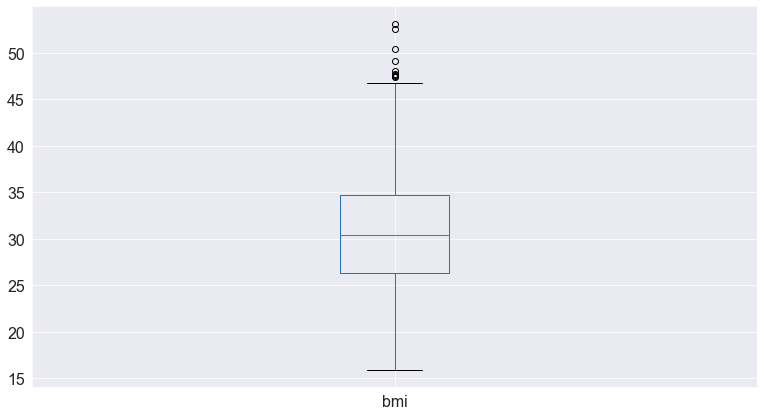

In [19]:
df['bmi'].plot(kind ='box')

There's presence of outliers in 

# CHARGES


Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're
trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and nonsmokers.

<AxesSubplot:>

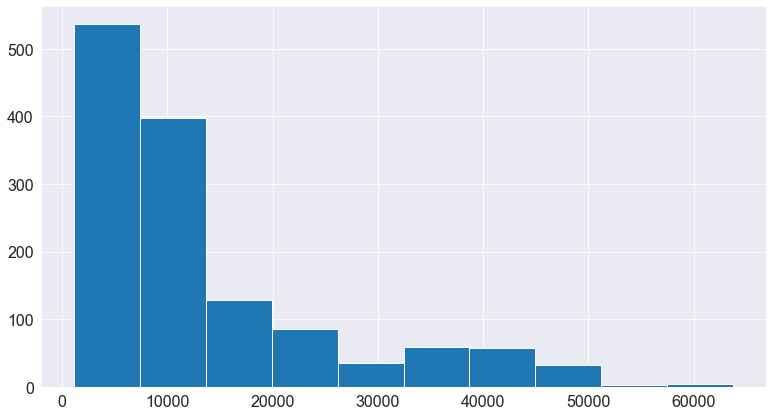

In [20]:
df['charges'].hist(grid = 'True')

<p>For most customers, the annual medical charges are under $10,000. Only a small fraction of customer have
higher medical expenses, possibly due to accidents, major illnesses ,chronic diseases(e.g cardiovascular diseases), genetic diseases</p>

array([<AxesSubplot:title={'center':'no'}>,
       <AxesSubplot:title={'center':'yes'}>], dtype=object)

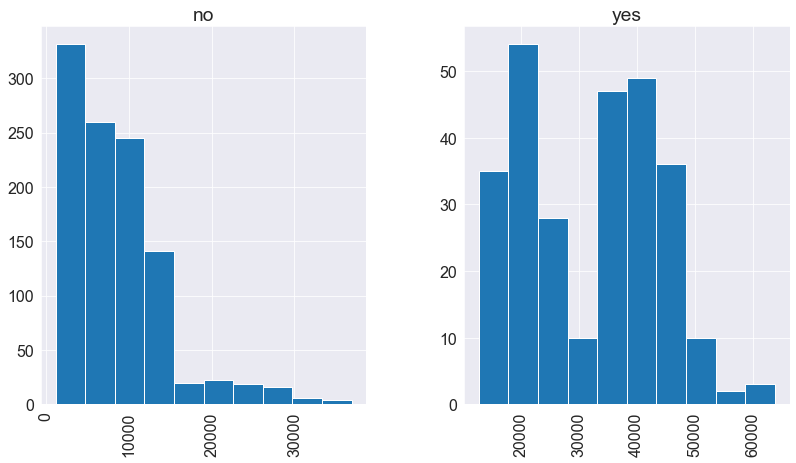

In [21]:
df['charges'].hist(grid = 'True', by=df['smoker'])

<p>The left is showing charges paid non smokers and right charges paid by smokers</p>

<p>It obvioius smokers paid more charges than non-smokers, Most of the non smokers paid under $10,000</p>



### SMOKER

<AxesSubplot:>

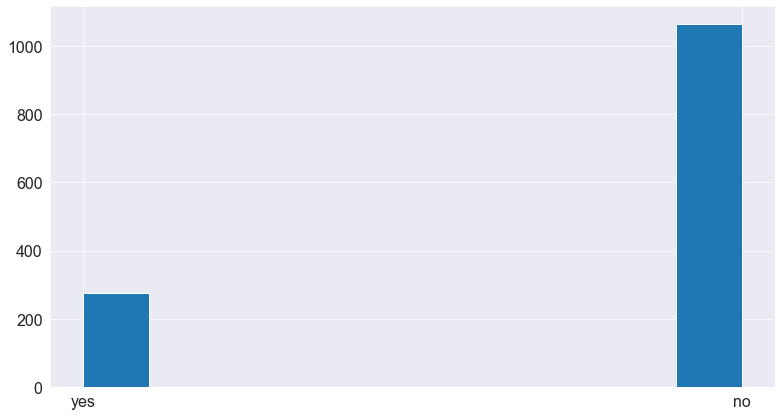

In [22]:
df['smoker'].hist()

In [23]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

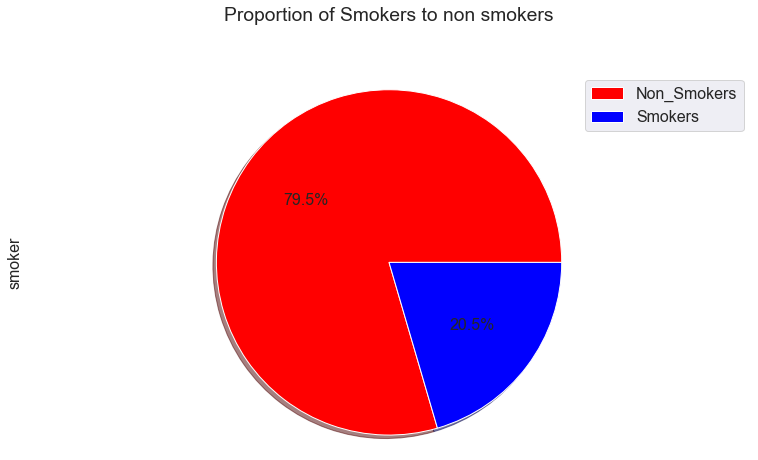

In [24]:
df['smoker'].value_counts().plot(kind='pie',
                                autopct='%1.1f%%',
                                shadow=True,
                                colors = ['red','blue'],
                                labels = None
                                )
# scale the title up by 12% to match pctdistance
plt.title('Proportion of Smokers to non smokers', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=['Non_Smokers', 'Smokers'],loc='best') 

plt.show()

* 79.5% of the customers are customers are smokers while 20.5% are non smokers

## Age and Charges

<p>Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.</p>

Text(0.5, 1.0, 'Age Vs Charges')

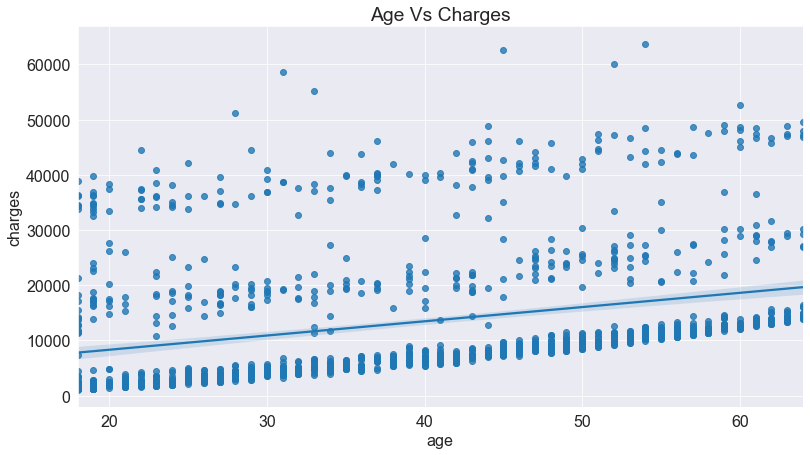

In [25]:
sns.regplot(df.age, df.charges)
plt.title("Age Vs Charges")


Text(0.5, 1.0, 'Age Vs Charges')

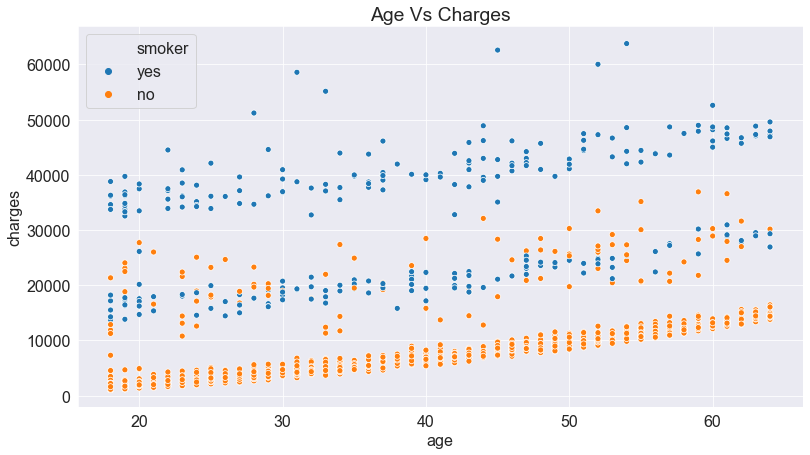

In [26]:
sns.scatterplot(df.age, df.charges, cmap='Spectral',hue=df.smoker)
plt.title("Age Vs Charges")


We can make the following observations from the above chart:
<li>The general trend seems to be that medical charges increase with age, as we might expect. However, there is
significant variation at every age and its clear that age alone cannot be used to accurately determine medical charges</li>

<li>We can see three clusters of points, each of which seems to form a line with an increasing slope</li>

<li>The first and largest cluster consists of healthy non smokers who have low medical charges compared with others</li>

<li>The second clusters consists of mix of smokers who doesnt have much medical issues and  and non smokers who have medical issues</li>

<li>The third cluster consists of smokers who have medical issues</li>

<AxesSubplot:xlabel='age', ylabel='charges'>

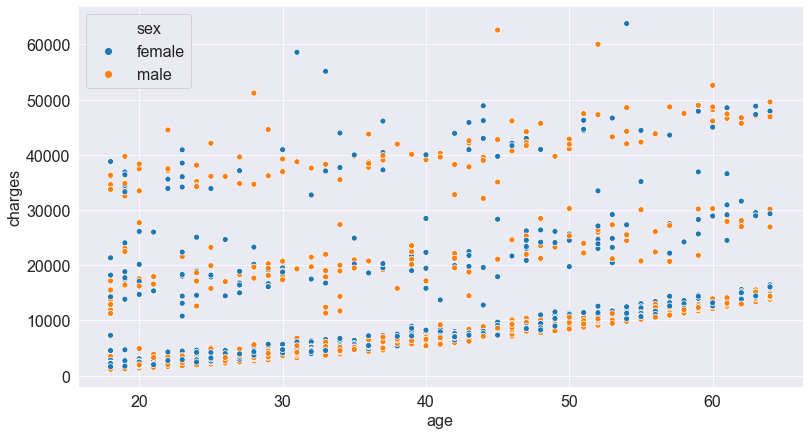

In [27]:
sns.scatterplot(df.age, df.charges,hue = df.sex)


There's mix of male and female to each of the cluster 



## BMI AND CHARGES

Text(0.5, 1.0, 'BMI Vs CHARGES')

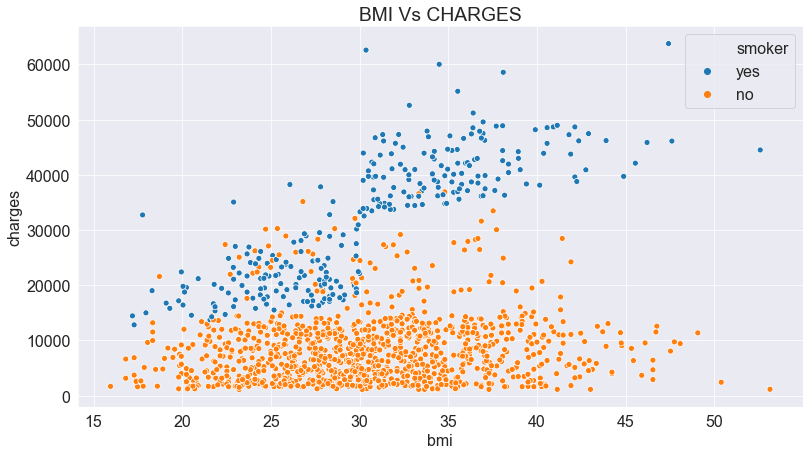

In [28]:
sns.scatterplot(x=df.bmi, y=df.charges, hue=df.smoker)
plt.title("BMI Vs CHARGES")

<li>It appears for non smokers, an increase in BMI doesn't seem to be realted to an increase in medical charges</li>

<li>However, medical charge seems to be significally higher for smokers with BMI greater than 30.</li>

Text(0.5, 1.0, 'BMI Vs CHARGES')

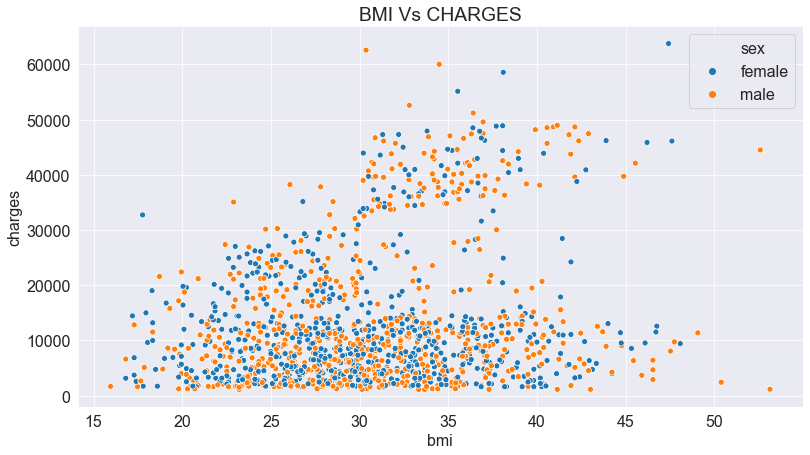

In [29]:
sns.scatterplot(x=df.bmi, y=df.charges, hue=df.sex)
plt.title("BMI Vs CHARGES")

<li>It appears that increase in BMI doesn't relate to only one gender but to both genders</li>
<li>few females have high medical charges  compared to men whose BMI are above 30</li>

<AxesSubplot:xlabel='children', ylabel='charges'>

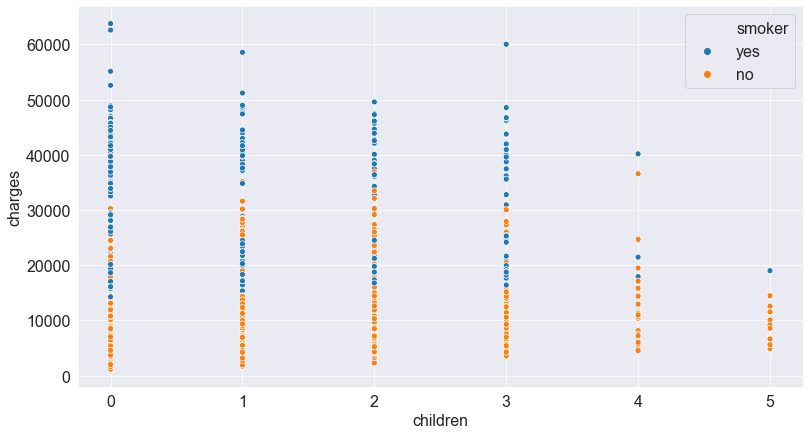

In [30]:
sns.scatterplot(x='children', y='charges', hue='smoker',data=df)

### CHILDREN VS CHARGES

<AxesSubplot:xlabel='children', ylabel='charges'>

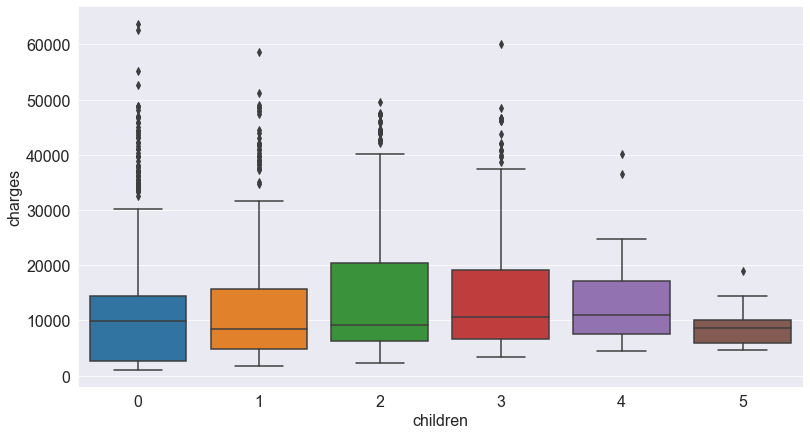

In [31]:
sns.boxplot(x='children', y='charges',data=df)

* We see that distributions of charges between different number of children have a significant overlap, children wil not be a good predictor of price

* It's observed from the plot above that the number of children doesn't determine the charges paid, cutsomers 2 children paid more than 2 children

<AxesSubplot:xlabel='children'>

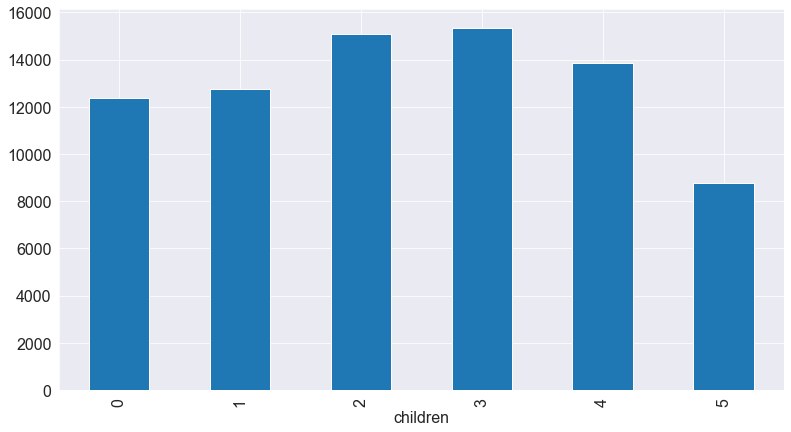

In [32]:
df.groupby(['children'])['charges'].mean().plot(kind='bar')

<AxesSubplot:xlabel='children', ylabel='charges'>

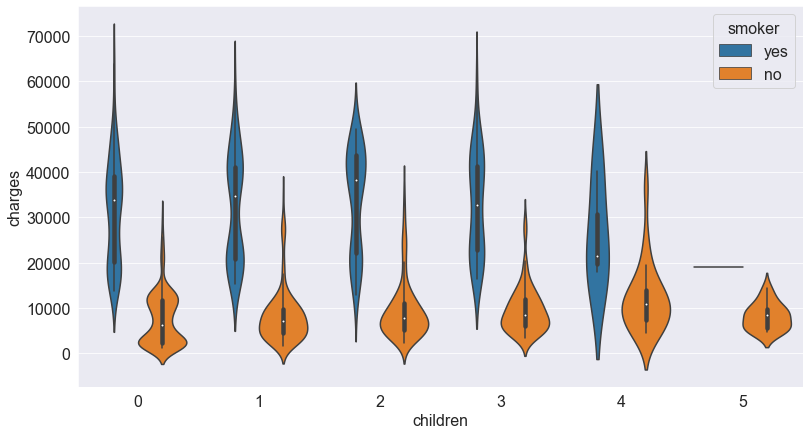

In [33]:
sns.violinplot(x='children', y='charges', hue='smoker',data=df)

<AxesSubplot:xlabel='children', ylabel='charges'>

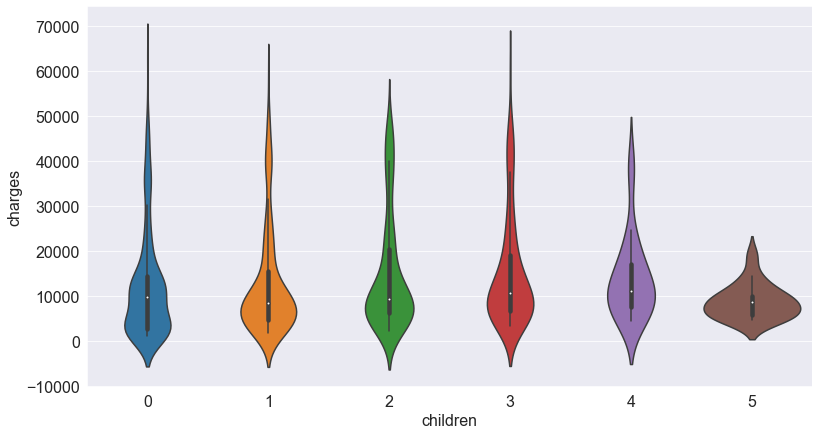

In [34]:
sns.violinplot(x='children', y='charges', data=df)

<li>From the violin plot's above,it obvious that smoker that have  children have impact on the charges compared to the non smokers that doesn't have children</li>

<AxesSubplot:>

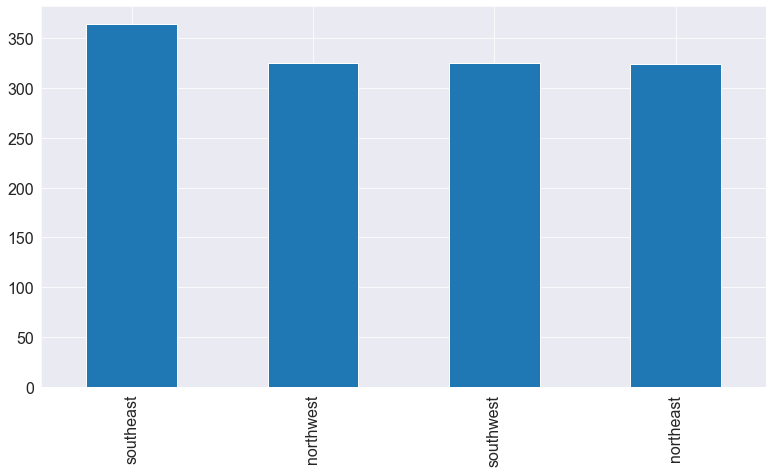

In [35]:
df['region'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='region', ylabel='charges'>

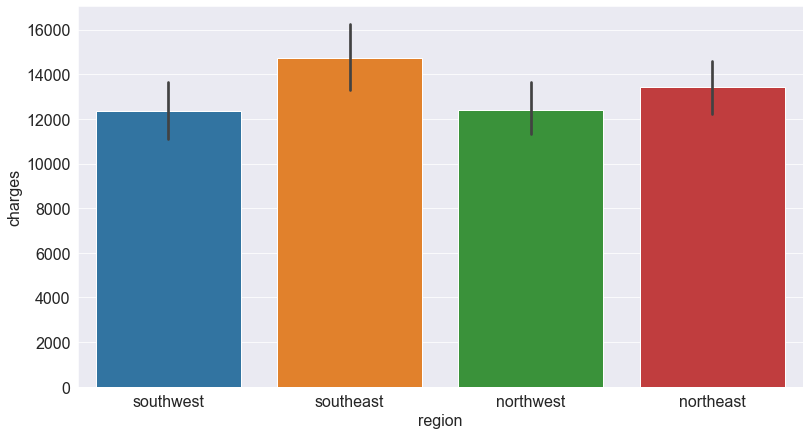

In [36]:
sns.barplot(x='region', y='charges', data=df)

# CORRELLATION

In [37]:

smoker_values = {'no':0,'yes':1}
df['smoker'] = df.smoker.map(smoker_values)

In [38]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(['female','male'])

df['sex'] = le.transform(df['sex'])


In [39]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()



In [40]:
encoder = OneHotEncoder(handle_unknown = 'ignore')

new_df = pd.DataFrame(encoder.fit_transform(df[['region']]).toarray())

df = df.join(new_df)

df

,age,sex,bmi,children,smoker,region,charges,status,0,1,2,3
0,19,0,27.900,0,1,southwest,16884.92400,overweight,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,obesity,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,obesity,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,HealthyWeight,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,overweight,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,obesity,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,northeast,2205.98080,obesity,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,southeast,1629.83350,obesity,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,southwest,2007.94500,overweight,0.0,0.0,0.0,1.0


In [41]:
df.rename(columns={0:'northeast',1:'northwest',2:'southeast',3:'southwest'},inplace = True)

In [42]:
df.head()

,age,sex,bmi,children,smoker,region,charges,status,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,overweight,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,obesity,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,obesity,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,HealthyWeight,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,overweight,0.0,1.0,0.0,0.0


In [43]:
df.corr()['charges'].sort_values()

southwest   -0.043210
northwest   -0.039905
northeast    0.006349
sex          0.057292
children     0.067998
southeast    0.073982
bmi          0.198341
age          0.299008
smoker       0.787251
charges      1.000000
Name: charges, dtype: float64

the strength between values increases as corr approaches 1 or -1

Text(0.5, 1.0, 'Correlation Matrix')

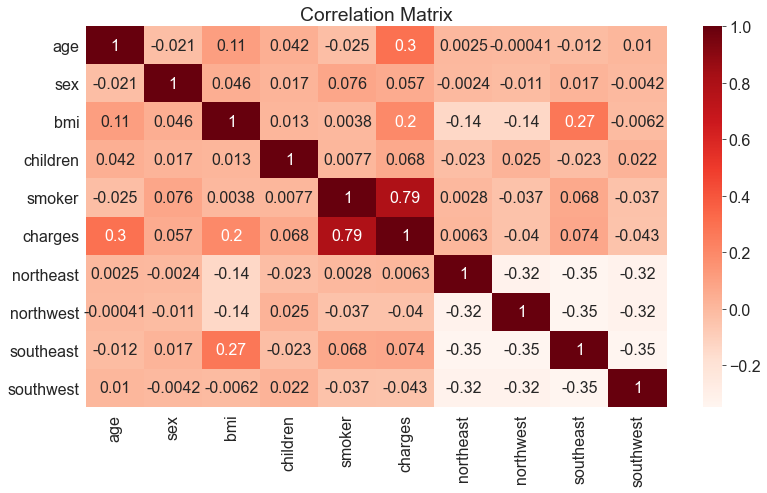

In [44]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

outhwest   -0.043210
northwest   -0.039905
northeast    0.006349
sex          0.057292
children     0.067998
southeast    0.073982
bmi          0.198341
age          0.299008
smoker 

In [45]:
df.head()

,age,sex,bmi,children,smoker,region,charges,status,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,overweight,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,obesity,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,obesity,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,HealthyWeight,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,overweight,0.0,1.0,0.0,0.0


In [46]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'status', 'northeast', 'northwest', 'southeast', 'southwest'],
      dtype='object')

In [47]:
x_multi =df[['age', 'sex', 'bmi', 'children', 'smoker', 'northeast', 'northwest', 'southeast', 'southwest']]
y_multi =df['charges']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size = 0.3, random_state=0)

In [50]:
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_test',x_test.shape)
print('y_test',y_test.shape)

x_train (936, 9)
y_train (936,)
x_test (402, 9)
y_test (402,)


### LINEAR REGRESSION

In [51]:
#for evaluating linear regression
from sklearn.linear_model import LinearRegression

In [52]:
lre=LinearRegression()

lre.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>

<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


In [53]:
lre.score(x_train,y_train)

0.7309569871174701

In [54]:
lre.score(x_test,y_test)

0.7909160991789904

In [55]:
yhat = lre.predict(x_train)
yhat[0:10]

array([ 2242.96674783,  8366.32939236, 18546.63796956,  7743.04604341,
        6170.58963259,  2231.51323771, 26807.19500482, 15133.74792058,
       10256.62089154, 16043.77368048])

In [56]:
yhat2 = lre.predict(x_test)
yhat2[0:10]

array([11253.1936458 ,  9544.90709422, 37849.80104825, 16069.2696851 ,
        6734.40872284,  4004.46268405,  1605.76550958, 14301.53003942,
        8896.96520648,  7341.11088079])

In [57]:
from sklearn.metrics import r2_score

In [58]:
r2_score(y_test,yhat2)

0.7909160991789904

In [59]:
r2_score(y_train,yhat)

0.7309569871174701

In [60]:
import math
from sklearn.metrics import mean_squared_error

In [61]:
math.sqrt(16)

4.0

In [62]:
mse = mean_squared_error(y_test, yhat2)
print('The mean square error of price and predicted value is: ', mse)
print('The root mean square error of price and predicted value is: ', math.sqrt(mse))

The mean square error of price and predicted value is:  33342497.82695458
The root mean square error of price and predicted value is:  5774.296305780868


In [63]:
mse = mean_squared_error(y_train, yhat)
print('The mean square error of price and predicted value is: ', mse)
print('The root mean square error of price and predicted value is: ', math.sqrt(mse))

The mean square error of price and predicted value is:  37931360.958770044
The root mean square error of price and predicted value is:  6158.844125221067


### FUNCTIONS FOR PLOTTING

In [64]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 15
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Charges Paid By Customers')
    plt.ylabel('Proportion of Customers ')

    plt.show()
    plt.close()

In [94]:
def PollyPlot(xtrain, xtest, y_train, y_test, lre,poly_transform):
    width = 15
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lre.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

Let's examine the distribution of the predicted values of the training data.


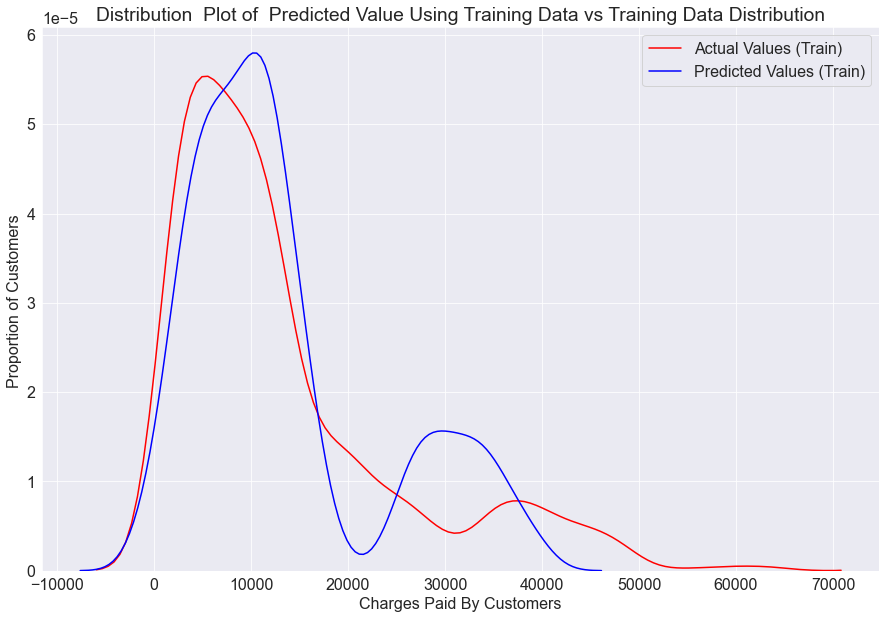

In [66]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat, "Actual Values (Train)", "Predicted Values (Train)", Title)

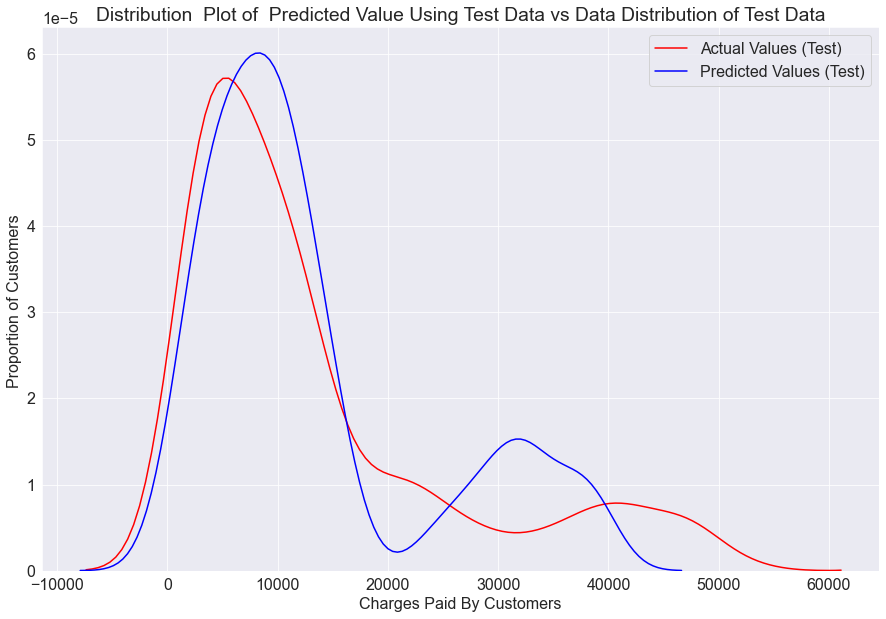

In [67]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat2,"Actual Values (Test)","Predicted Values (Test)",Title)

### CROSS-VALIDATION SCORE

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
Rcross = cross_val_score(lre, x_multi, y_multi, cv=3)

Rcross2 = cross_val_score(lre, x_multi, y_multi, cv=4)

Rcross3 = cross_val_score(lre, x_multi, y_multi, cv=5)

In [70]:
print("The mean of the folds3 are", Rcross.mean(), "and the standard deviation is" , Rcross.std())
print('')
print("The mean of the folds4 are", Rcross2.mean(), "and the standard deviation is" , Rcross2.std())
print('')
print("The mean of the folds5 are", Rcross3.mean(), "and the standard deviation is" , Rcross3.std())

print('  ')


The mean of the folds3 are 0.7442470405616105 and the standard deviation is 0.011539721059754787

The mean of the folds4 are 0.7460373358279184 and the standard deviation is 0.025090597207973506

The mean of the folds5 are 0.746861624347374 and the standard deviation is 0.024873741442236696
  


In [71]:
Rcross

array([0.74927063, 0.7551822 , 0.7282883 ])

In [72]:
-1 * cross_val_score(lre,x_multi, y_multi,cv=4,scoring='neg_mean_squared_error')

array([37065292.51912463, 38489392.38253701, 31226427.19209621,
       41116571.54455053])

In [153]:
cross_val_score(lre,x_multi, y_multi,cv=4)

array([0.7717616 , 0.71032376, 0.76732711, 0.73473688])

In [171]:
param_range = np.arange(1,1000,10)

In [156]:
from sklearn.model_selection import validation_curve

In [172]:
train_scores, test_scores = validation_curve(Ridge(),x_train_s,y_train, "alpha", param_range, scoring='r2')

In [174]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

In [175]:
max(test_mean)

0.7212625461350681

In [176]:
np.where(test_mean==max(test_mean))

(array([0], dtype=int64),)

In [177]:
param_range[0]

1

In [178]:
lm_r_best = Ridge(alpha = param_range[0])

In [179]:
lm_r_best.fit(x_train_s, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [180]:
r2_score(y_test, lm_r_best.predict(x_test_s))

0.7908415408242804

### PIPELINE

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [74]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [75]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [76]:
x_train = x_train.astype(float)
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [77]:
pipe.score(x_train, y_train)

0.8269463194922755

In [78]:
pipe.score(x_test, y_test)

0.8714584440940386

In [79]:
y_pred = pipe.predict(x_train)

In [80]:
y_pred2 = pipe.predict(x_test)

In [81]:
r2_score(y_train,y_pred)

0.8269463194922755

In [82]:
r2_score(y_test, y_pred2)

0.8714584440940386

### GRID SEARCH

In [83]:
from sklearn.model_selection import GridSearchCV

n = []
for i in range( 1000000):
    n.append(i)


parameters= [{'alpha': n}]


In [84]:
s = {'cv':[1,2,3,4,5,6,7,8,9,10]}
s.values()

dict_values([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]])

In [85]:
parameters= [{'alpha': [0.001,0.1,1,2,3,4,5, 10, 100, 1000, 10000, 100000, 100000]},
             {'normalize':[True,False]}]
parameters

[{'alpha': [0.001, 0.1, 1, 2, 3, 4, 5, 10, 100, 1000, 10000, 100000, 100000]},
 {'normalize': [True, False]}]

In [86]:
from sklearn.linear_model import Ridge

In [87]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [88]:
Grid = GridSearchCV(RR, parameters,cv=3, iid=None)

In [89]:
Grid.fit(x_train,y_train)

C:\Users\SLAMAK\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid=None, n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 2, 3, 4, 5, 10, 100, 1000,
                                    10000, 100000, 100000]},
                         {'normalize': [True, False]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [90]:
Grid.estimator.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [91]:
BestRR=Grid.best_estimator_
BestRR

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [92]:
BestRR.score(x_test, y_test)

0.7908725915502954

### RIDGE REGRESSION

In [148]:
scaler = preprocessing.StandardScaler().fit(x_train)


In [149]:
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)


In [150]:
lm_r =  Ridge(alpha=1.0)
lm_r.fit(x_train_s,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [151]:
r2_score(y_test,lm_r.predict(x_test_s))

0.7908415408242804

### POLYNOMIAL FEATURES

Text(3, 0.75, 'Maximum R^2 ')

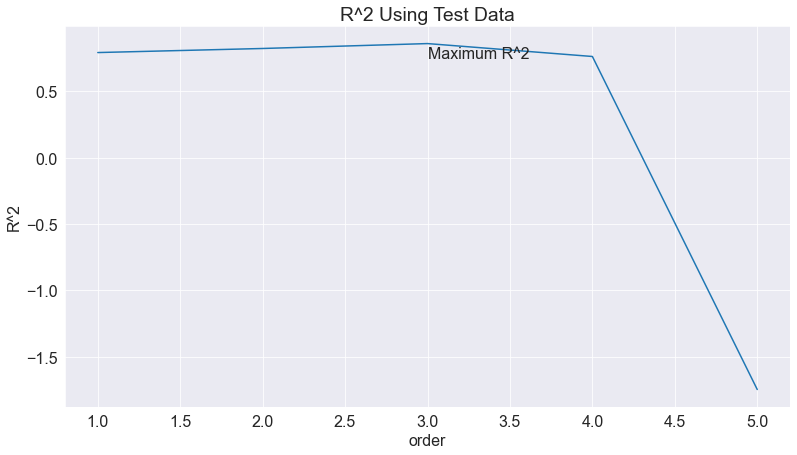

In [93]:
Rsqu_test = []
lr = LinearRegression()
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train)
    
    x_test_pr = pr.fit_transform(x_test)    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data') 
plt.text(3, 0.75, 'Maximum R^2 ')    

In [105]:
pr = PolynomialFeatures(degree=4)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
pr

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')

In [106]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
poly.score(x_train_pr, y_train)

0.8742373975124377

In [108]:
poly.score(x_test_pr, y_test)

0.7613254356765458